Abstract / Discussion:
Welcome! Today, I am going to demonstrate how we train a Linear Regression model in order to make predictions on species of penguins using the Palmer Penguins dataset. 

First we are going to import pandas and numpy, two python libraries that are very useful for data manipulation and viewing. Afterwards we will find the csv file of the training data through the url shown and use the pd.read_csv method to create from the csv file a pandas DataFrame object.

In [2]:
import pandas as pd
import numpy as np


train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

Let's see 5 of the pieces of data we are working with using the head() method.

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


We are now going to prepare the data. Here we drop columns that are likely unhelpful in making a prediction on the species of penguins, specifying axis = 1 to delete the column instead of the index. We then remove all rows were the value of df["Sex"] is undefined or ".". We use the method dropna() to drop all the rows that contain missing values. We then use the method fit() from the LabelEncoder object to pick numerical values from qualitative values. For example, our penguin species are "Gentoo", "Chinstrap", and "Adelie" which could be encoded as 0, 1, and 2. Now that we have encoded the values of the "Species" column, we create a column that uses that encoding with le.transform, and we want to use the encoded values on the "Species" column, so we will do le.transform(df["Species"]) and store this new column in y. We will then drop the original Species column as we will not need it for our prediction. Finally, we do pd.get_dummies(df) which will convert all categorical variables that only have 2 unique values to a 0 or a 1. With this, we have prepared are data and are ready to use it to make predictions on species of Penguins.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

for i, c in enumerate(le.classes_):
    print(f"Class number {i} represents {c} penguins.")

X_train, y_train = prepare_data(train)

Class number 0 represents Adelie Penguin (Pygoscelis adeliae) penguins.
Class number 1 represents Chinstrap penguin (Pygoscelis antarctica) penguins.
Class number 2 represents Gentoo penguin (Pygoscelis papua) penguins.


In [5]:
X_train.shape[0], y_train.shape[0]

(256, 256)

Here, we also enumerated through the classes made by the LabelEncoder and used a fstring to cleanly show which number encoding referes to which penguin.

Now we can see that we have removed unnessecary columns, 

In [6]:
X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,40.9,16.6,187.0,3200.0,9.08458,-24.54903,False,True,False,True,False,True,True,False
1,49.0,19.5,210.0,3950.0,9.53262,-24.66867,False,True,False,True,False,True,False,True
2,50.0,15.2,218.0,5700.0,8.25540,-25.40075,True,False,False,True,False,True,False,True
3,45.8,14.6,210.0,4200.0,7.79958,-25.62618,True,False,False,True,False,True,True,False
4,51.0,18.8,203.0,4100.0,9.23196,-24.17282,False,True,False,True,False,True,False,True


Here we use the train_test_split method to split our training and testing data. Talk about the importance of the train and test split (This is cross validation right?)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=3)

In [8]:
#How are we going to see the porition of each type of penguin when it is encoded

He we are going to visualize the data in order to find useful features that may help us create a predictor model.

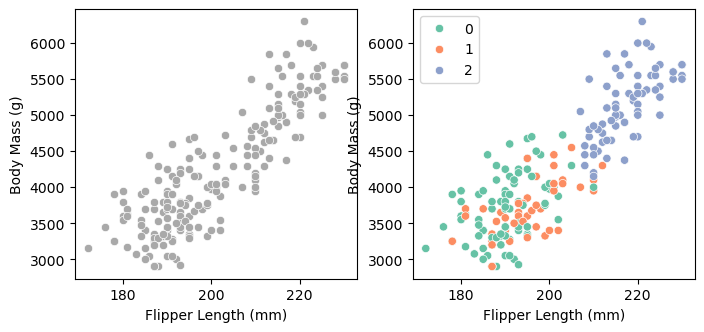

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

p1 = sns.scatterplot(X_train, x = "Flipper Length (mm)", y = "Body Mass (g)", ax = ax[0], color = "darkgrey")
p2 = sns.scatterplot(X_train, x = "Flipper Length (mm)", y = "Body Mass (g)", ax = ax[1], hue = y_train, palette="Set2")

Here we can see that the relationship between Flipper Length and Body Mass is good for distinguishing between Gentoo penguins and the other two species, however it is not so good for dintinguishing between the Adelie and Chinstrap penguin species.

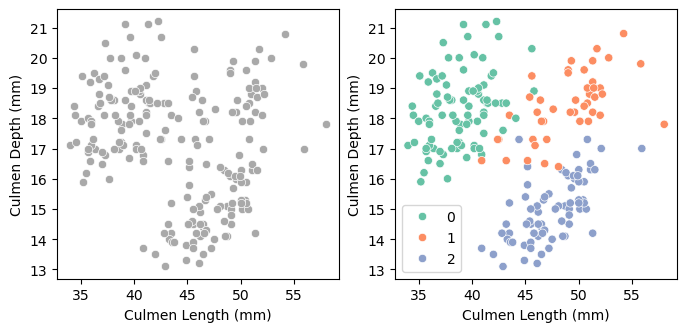

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3.5))

p1 = sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", ax = ax[0], color = "darkgrey")
p2 = sns.scatterplot(X_train, x = "Culmen Length (mm)", y = "Culmen Depth (mm)", ax = ax[1], hue = y_train, palette="Set2")

This one is good. 

Summary Table:

This is an example of the blog posts that you'll submit as your primary form of learning demonstration in CSCI 0451. I created this post by modifying the file `posts/example-blog-post/index.ipynb` in VSCode. You can also use JupyterLab for this editing if you prefer. Finally, it is possible to write blog posts without using notebooks by writing `.qmd` files, as illustrated [here](https://quarto.org/docs/get-started/hello/vscode.html). 

# Frontmatter

Your notebook needs to contain some metadata: things like the title, author, date, etc. You specify this in a `raw` cell at the very beginning of the notebook. In this notebook, the contents of this cell is: 

```
---
title: Hello Blog
author: Phil Chodrow
date: '2023-01-10'
image: "image.jpg"
description: "An example blog post illustrating the key techniques you'll need to demonstrate your learning in CSCI 0451."
format: html
---
```

Frontmatter can be fiddly (it's sensitive to spaces, for example), and so the best approach is usually to copy and paste it from previous blog posts, modifying it as appropriate. 


# Running Python Code

To run Python code, place your code in a Python code block inside your notebook. You can run the code block inside VSCode (or JupyterLab) using the keyboard shortcut `ctrl + Enter`. You'll see the result of your computation below the code, including the value of the most recent statement. 

In [ ]:
"CSCI" + " 0451"

'CSCI 0451'

We'll have lots of opportunities to make data visualizations in this course. These also display inside the notebook, and get converted into your blog post: 

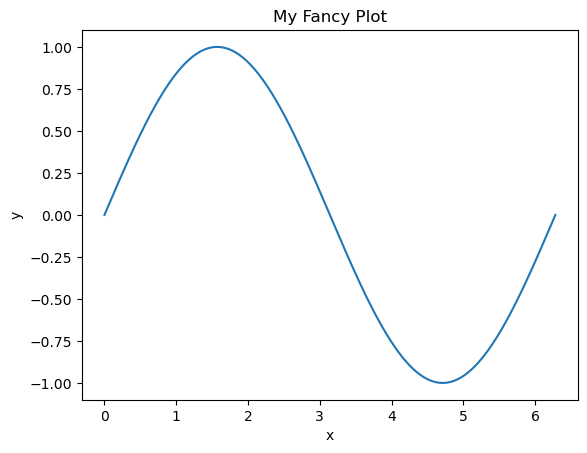

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 2*np.pi, 1001)
y = np.sin(x)
fig = plt.plot(x, y)
xlab = plt.xlabel("x")
ylab = plt.ylabel("y")
title = plt.gca().set(title = "My Fancy Plot")

Another thing we'll often do is implement an algorithm in a source file (i.e. a `.py` file) and then *use* it in a notebook. To do this, just place the `.py` file in the same directory as the notebook. For example, the file `source.py` in the same directory contains a custom function (which prints a message). I can use like this: 

In [ ]:
import source 
source.my_custom_function()

I implemented this function in the file source.py


# Markdown

You can use Markdown syntax to write text in Markdown cells. Markdown allows you to create simple text formatting like bullets, italics, and section headers. The Quarto [description of markdown basics](https://quarto.org/docs/authoring/markdown-basics.html) has everything you need to get started. 

## Math

In addition to regular text using the Markdown specification, you can also write mathematics, enclosed between dollar signs. The syntax for writing math is very similar to the syntax used in the $\LaTeX$ markup language. For example, `$f(x) \approx y$` renders to $f(x) \approx y$. To place complex mathematical expressions on their own lines, use double dollar signs. For example, the expression 

`$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2$$` 

renders to: 

$$\mathcal{L}(a, b) = \sum_{i = 1}^n (ax_i + b - y_i)^2\;.$$

Behind the scenes, math is powered by the MathJax engine. For more on how to write math, check this handy [tutorial and quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference). 